# FALL 2020 -> CSE 5334 -> Data Minning
## Assignment 1
### Name:  Tirumala Manukonda (UTA ID# 1001662386)

#### Assignment on Overfitting using Polynomial regression  

__Summary__: 
- a.Generate 20 data points using X as normal distribution between 0 to 1 and Y as sin(2*pi*X) + N,
- b.Split data into train and test sets equally
- c.Find weights of polynomial regression for order 1,3,5,9
- d.Display weights in a table
- e.Plot the predicted Model values and  True function, observe the behaviour of both lines
- f.Plot Train Vs Test errors using degrees(1 to 9)
- g.Generate 100 more data points and draw 9th degree model
- h.Use regularized weight fuction,E(w)= (1 / (2 * n_samples)) * ||y - Xw||^2_2 + lamda * ||w||_2 which is same as the Ridge  
  regression weighted function, 
- i.plot the Model and true funcntion for the values of Lamda = (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001)
- j.Plot Train Vs Test error function of different lamda values 
- k.Observing the performance of the model.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import math
from math import sin, cos, pi
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import Ridge

- overall list of modules that are used in this assignment

In [52]:
import pandas as pd
import numpy as np
import math
from numpy import random
from math import sin, cos, pi
def true_fun(X):
    return np.sin(2 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
np.random.seed(0)
degrees = [1, 3, 9]
n_samples = 20

x = np.linspace(0,1,n_samples).reshape((-1,1))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

- Import the necessary modules of numpy,pandas,Maths and Random number,
  Defined as True Function as sin(2 *pi * X), x from uniform distribution from 0 to 1,
  Get y from the true funtion and N from normal gaussian distribution

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.5)

- split the data into 10 training and 10 testing data points

M 0:  [0.]
M 1  [-1.57303801]
M 3  [ 12.23981224 -35.71010989  23.7186848 ]
M 9  [ 2.20664054e+01 -3.78596303e+02  3.58599460e+03 -1.74449401e+04
  4.72926600e+04 -7.53481059e+04  7.03374885e+04 -3.56254092e+04
  7.55880317e+03]


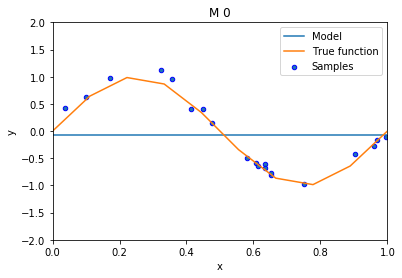

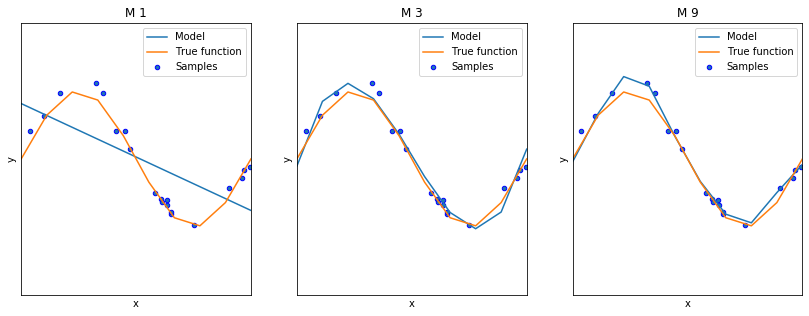

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#ploynomial of degree = 0,plotted seperately
poly =  PolynomialFeatures (degree = 0)
X_poly = poly.fit_transform(X.reshape(-1,1))
poly.fit(X_poly, y)
linReg = LinearRegression()
linReg.fit(X_poly, y)
print('M 0: ',str(linReg.coef_))
X_test = np.linspace(0, 1, 10)
plt.plot(X_test, linReg.predict(poly.fit_transform(X_test[:, np.newaxis])), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("M 0")

#ploynomial of remaining degrees with the pipeline implemention and all plotted together
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1 )
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    print('M {} '.format(degrees[i]),str(linear_regression.coef_))
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("M {}".format(
        degrees[i]))
plt.show()


- using sklearn printed the individual weights and then plotted the predicted model values and True function values for the degrees of 0,1,3,9

- Note: Created degree(0) seperately so that my for loop doesn't terminate for 0 degree polynomial in the pipeline model 
    and its easy for me to observe degrees other than using the loop function and ease to visual those 

- Observation :- For the degree 0, my model is underfitting as the degree increases it fits the true function and 
    for degree =3 its seems like good prediction and after that it starts overfitting , Degree =9 its overfitting the noise also

In [55]:
weights = {"": ["wo","w1","w2","w3","w4","w5","w6","w7","w8","w9"],
          "M0": ["0.0", "","","","","","","","","" ],"M1": ["-1.51717071", "","","","","","","","","" ],
           "M3": ["9.99044005", "-30.10265523","20.2610467","","","","","","","" ],
           "M9": ["-5.00052495e+01", "1.09114073e+03","20.2610467","-9.42056447e+03","4.24633952e+04","-1.11016488e+05","1.74183120e+05","-1.61661178e+05","8.18052541e+04","-1.73957031e+04" ] }
df = pd.DataFrame(weights)
df

,,M0,M1,M3,M9
0,wo,0.0,-1.51717071,9.99044005,-5.00052495e+01
1,w1,,,-30.10265523,1.09114073e+03
2,w2,,,20.2610467,20.2610467
3,w3,,,,-9.42056447e+03
4,w4,,,,4.24633952e+04
5,w5,,,,-1.11016488e+05
6,w6,,,,1.74183120e+05
7,w7,,,,-1.61661178e+05
8,w8,,,,8.18052541e+04
9,w9,,,,-1.73957031e+04


- table with all the values of weights for the degrees of 0, 1, 3, 9 polynomials, 
  displayed weights after plotting the graphs so that i can use the loop function values easily to get the coefficients..

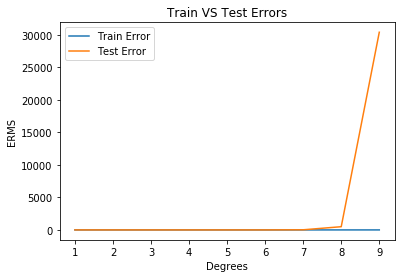

In [56]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]

train_errors = list()
test_errors = list()

for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    model.fit(x_train[:, np.newaxis], y_train)
    ytrain_pred = model.predict(x_train.reshape(-1,1))
    y_pred = model.predict(x_test.reshape(-1,1))
    train_errors.append(np.sqrt(metrics.mean_squared_error(y_train, ytrain_pred)))
    test_errors.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plt.plot(degrees, train_errors, label="Train Error")
plt.plot(degrees, test_errors, label="Test Error")
plt.xlabel("Degrees")
plt.ylabel("ERMS")
plt.legend(loc="best")
plt.title("Train VS Test Errors".format(
        degrees[i]))
plt.show()

-Plotting of training vs test errors
 
 Obesrvation :- Training error is intially little high and kept decreasing as the degree increases and like a constant value after some values of the degress above 3, Test error also follows the train error closely upto degree 7 after that test error increased totally which is why the model is overfitting the values after degree 7..

In [57]:
n_samples = 100
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.5)


- Now the total number of samples have cahnged to 100 and split equally into train and test data

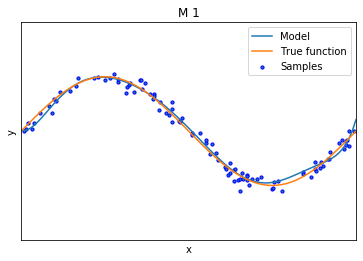

In [64]:
D = [9]
for i in range(len(D)):
    ax = plt.subplot(1, len(D), i+1 )
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=D[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    X_test = np.linspace(0, 1, 100)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(x_train[:, np.newaxis], y_train)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=10, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("M {}".format(
        degrees[i]))
plt.show()

- Degree 9 ploynoimial regression, With the number of samples increases the model fits perfectly when compared to that with the small samples

In [69]:
def true_fun(X):
    return np.sin(2 * np.pi * X)


n_samples = 20

X = np.sort(np.random.rand(n_samples))
np.random.seed(0)
degrees = [1, 3, 9]
n_samples = 20
x = np.linspace(0,1,n_samples).reshape((-1,1))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.5)

- updating the data points again to 20 samples and splitting the data into train and test data

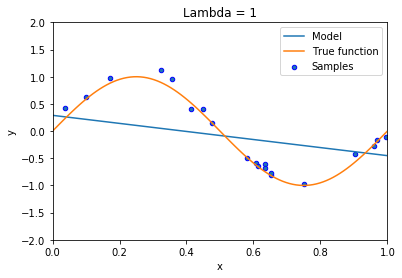

In [81]:
# Ew =  (1 / (2 * n_samples)) * ||y - Xw||^2_2 + lamda * ||w||^2
# lambda == 1
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import Ridge
reg = Ridge(alpha = 1)
reg.fit(x_train[:, np.newaxis], y_train)
plt.plot(X_test, reg.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Lambda = 1")
plt.show()

-_Note_ : The Weighted cost function given in the assignment Ew =  (1 / (2 * n_samples)) * ||y - Xw||^2_2 + lamda * ||w||^2 is same as the ridge regression cost function
    so i used the ridge regression module for different values of lamda which is same as the aplha values in the above 

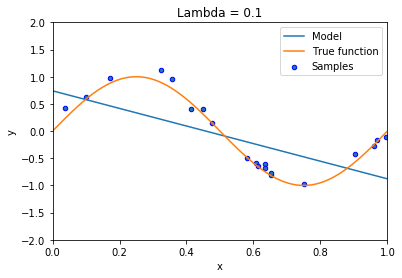

In [82]:
# Ew =  (1 / (2 * n_samples)) * ||y - Xw||^2_2 + lamda * ||w||^2
# lambda == 0.1
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import Ridge
reg = Ridge(alpha = 0.1)
reg.fit(x_train[:, np.newaxis], y_train)
plt.plot(X_test, reg.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Lambda = 0.1")
plt.show()

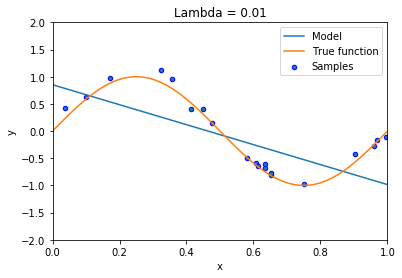

In [83]:
# Ew =  (1 / (2 * n_samples)) * ||y - Xw||^2_2 + lamda * ||w||^2
# lambda == 0.01
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import Ridge
reg = Ridge(alpha = 0.01)
reg.fit(x_train[:, np.newaxis], y_train)
plt.plot(X_test, reg.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Lambda = 0.01")
plt.show()

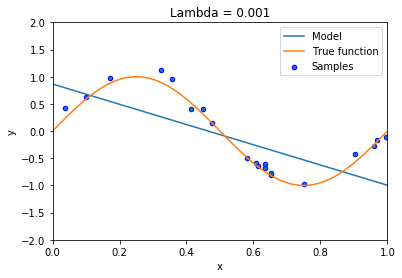

In [84]:
# Ew =  (1 / (2 * n_samples)) * ||y - Xw||^2_2 + lamda * ||w||^2
# lambda == 0.001
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import Ridge
reg = Ridge(alpha = 0.001)
reg.fit(x_train[:, np.newaxis], y_train)
plt.plot(X_test, reg.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Lambda = 0.001")
plt.show()

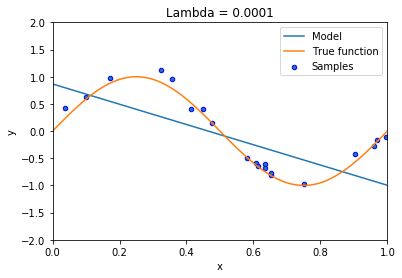

In [85]:
# Ew =  (1 / (2 * n_samples)) * ||y - Xw||^2_2 + lamda * ||w||^2
# lambda == 0.0001
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import Ridge
reg = Ridge(alpha = 0.0001)
reg.fit(x_train[:, np.newaxis], y_train)
plt.plot(X_test, reg.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Lambda = 0.0001")
plt.show()

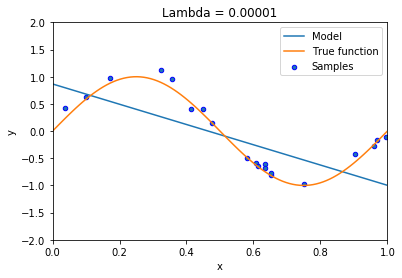

In [86]:
# Ew =  (1 / (2 * n_samples)) * ||y - Xw||^2_2 + lamda * ||w||^2
# lambda == 0.00001
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import Ridge
reg = Ridge(alpha = 0.00001)
reg.fit(x_train[:, np.newaxis], y_train)
plt.plot(X_test, reg.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Lambda = 0.00001")
plt.show()

- Here i plotted individual graphs for the given lamda values of (1,1/10, 1/100, 1/1000, 1/10000, 1/100000)
- observation :- Observation is that noticed intially its underfitting and then its performing better as value of lamda kept decreasing.but felt i didn't get proper value of lambda with the given values.

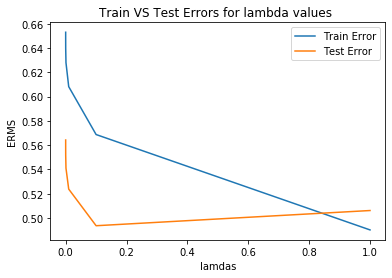

In [89]:
lambdas = (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001)
train_errors = list()
test_errors = list()

for i in range(len(lambdas)):
    reg = Ridge(alpha = i)
    reg.fit(x_train[:, np.newaxis], y_train)
    ytrain_pred = reg.predict(x_train[:, np.newaxis])
    y_pred = reg.predict(x_test[:, np.newaxis])
    train_errors.append(np.sqrt(metrics.mean_squared_error(y_train, ytrain_pred)))
    test_errors.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plt.plot(lambdas, train_errors, label="Train Error")
plt.plot(lambdas, test_errors, label="Test Error")
plt.xlabel("lamdas")
plt.ylabel("ERMS")
plt.legend(loc="best")
plt.title("Train VS Test Errors for lambda values ")
plt.show()

- observation :- Observation is that the model will be performing better with the values of lamda between 0.1 to 0.7 and after that test error increases 
    and the training is also decreasing as the lambda increases after o.1
   

__Summary__ : Of all the given values of M, I would say M=3 degree would give best test perfomance as it is not overfitting or underfitting the training curve and Its performing better than other values of M 